# Homework 5: Multiple Regression

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by **11:59pm on the due date listed in Canvas**. Start early so that you can come to office hours if you're stuck. Check Canvas for the office hours schedule. Late work will not be accepted as per the policies described in the Canvas syllabus. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import otter
grader = otter.Notebook()

In this assignment we'll use a dataset containing the relationship between various expenditures and profit derived from 50 tech startups. 

In [2]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Our goal is to create various linear regression models of the relationship between Profit and certain expenditures, and interpret their output. 

To begin, when considering multiple predictors for linear regression, it can help to visualize the pairwise relationship between each variable. 

*Consider*: Which variables seem to have a reasonable correlation with Profit?

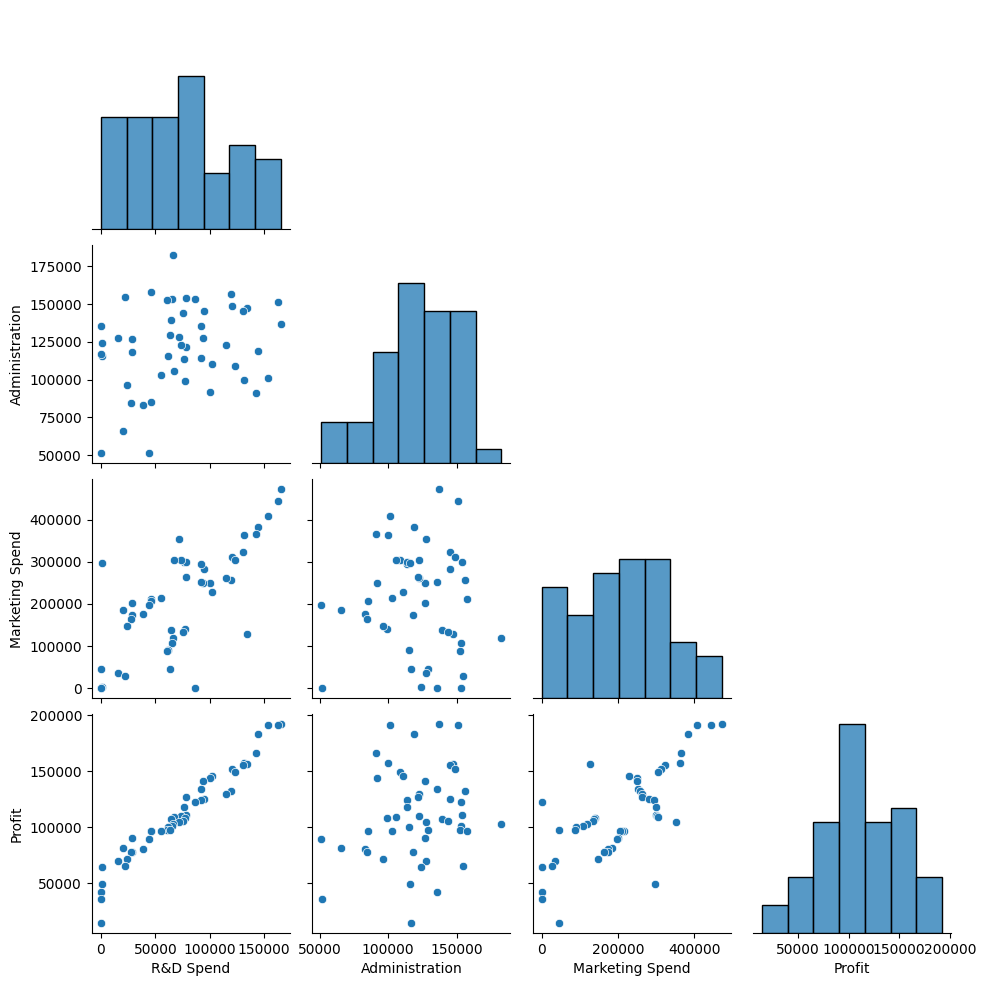

In [3]:
# Just run this code
sns.pairplot(startups, corner = True);

### Simple linear regression

We'll first model Profit using Simple Linear Regression *i.e.* with a single predictor. To fit a linear model with Sci-Kit learn, we need to instantiate an empty model and then fit it.

In [4]:
from sklearn.linear_model import LinearRegression

Using the empty linear model, we'll `fit` the model with `X` and `y` variables. 

#### Question 1.1 

Create two variables, `X` and `y`. 

`X` should be the **R&D Spend** column from `startups`.

`y` should be the **Profit** column from `startups` 

*Hint* To fit the model, `X` needs to be formatted as a DataFrame, not a Series or numpy array. To do this use double brackets [[ ]] when indexing the column. This is *not the case* for `y`.

In [12]:
X = startups[['R&D Spend']]
y = startups['Profit']

In [13]:
grader.check("q1_1")

q1_1 results: All test cases passed!

#### Question 1.2

Now fit the model using `X` and `y`. Fitting the model has the following format:

`new_model = model_instance.fit(X,y)`

In [14]:
slm = LinearRegression() 

# Fit slm using X and y
rd_slm = slm.fit(X,y)

In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

#### Question 1.3

Use the model you just fit to predict values on X. Use the [.predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method. 

Then, create a scatterplot of **Profit** vs **R&D Spend** along with the line of your predictions.

<AxesSubplot: >

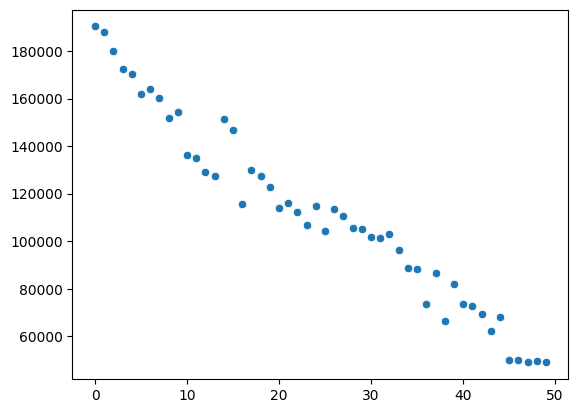

In [15]:
slm = LinearRegression() 

rd_preds = rd_slm.predict(X=X)

# Create plot
sns.scatterplot(rd_preds)

In [16]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 1.4

Now do the same as you've just done in Questions 1.1-1.3 with **Marketing Spend** as your predictor instead.

<AxesSubplot: >

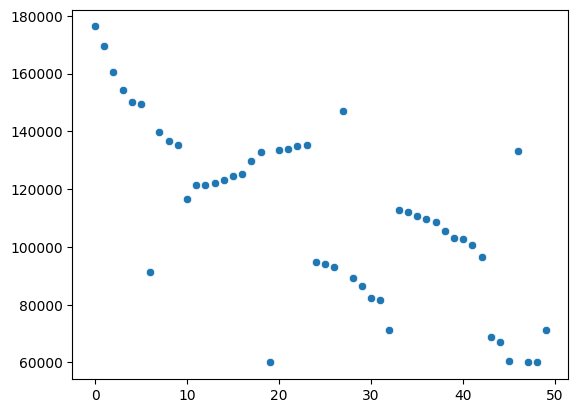

In [32]:
X = startups[['Marketing Spend']]

slm = LinearRegression() 

ms_slm = slm.fit(X,y)

ms_preds = ms_slm.predict(X=X)

# Create plot
sns.scatterplot(ms_preds)

In [18]:
grader.check("q1_4")

q1_4 results: All test cases passed!

#### Question 1.5

Visually, which of these models do you think fits better? Why?

R&D Spend, it looks more linear.

#### Question 1.6

Define a function called `rmse` that returns the root mean squared error of two arguments: predicted y-values and actual values. 

In [19]:
def rmse(predictions, actual):
    return np.sqrt(np.mean((predictions - actual)**2))

In [20]:
grader.check("q1_6")

q1_6 results: All test cases passed!

#### Question 1.7

Using your function, determine the root mean squared error of each model. Which model fits better? Answer either "R&D Spend" or "Marketing Spend"

In [62]:
rd_rmse = rmse(rd_preds, y)
ms_rmse = rmse(ms_preds, y)

print("R&D Spend error:", rd_rmse)
print("Marketing Spend error:", ms_rmse)

R&D Spend error: 9226.100548285232
Marketing Spend error: 26492.82942981263


In [30]:
better_fitting = 'R&D Spend'

In [31]:
grader.check("q1_7")

q1_7 results: All test cases passed!

### Multiple linear regression

There is good reason to suspect that both R&D investment and marketing expenditure can drive higher profits, and the simple linear models support this notion. We should try using both predictors in a single model by performing a multiple linear regression to get an even better fit. 

#### Question 2.1 

Fit a linear model with an X that contains both **R&D Spend** and **Marketing Spend**.

In [35]:
mlr = LinearRegression() 

X = startups[['R&D Spend', 'Marketing Spend']]

two_lm = mlr.fit(X=X, y=y)

In [36]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Question 2.2

What are the coefficients associated with each variable in the multiple regression?

*Hint*: Look at the Attributes (and examples if need be) of these models [in the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

*Another hint*: Consider the order of the variables in `X`

In [53]:
rd_coef = two_lm.coef_[0]
ms_coef = two_lm.coef_[1]

In [54]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 2.3

Are the coefficients for each predictor in the multiple regression the same as their coefficients in the simple linear regression? Explain why or why not.

No, because error decreases as we add more predictors.

#### Question 2.4

Fit one more model, this time with all three predictors (**Administration** included). Then calculate the rmse on both the two predictor model (q2.1) and the full model you just made. 

In [56]:
# Predict values for the model with two predictors
X = startups[['R&D Spend', 'Marketing Spend']]
two_preds = two_lm.predict(X=X)

# Predict values for the model with all predictors
X = startups[['R&D Spend', 'Marketing Spend', 'Administration']]
mlr = LinearRegression() 
all_lm = mlr.fit(X=X, y=y)
all_preds = all_lm.predict(X=X)

In [59]:
two_rmse = rmse(two_preds, y)
all_rmse = rmse(all_preds, y)

In [60]:
print("R&D Spend + Marketing Spending error:", two_rmse)
print("All predictors error:", all_rmse)

R&D Spend + Marketing Spending error: 8881.885892449169
All predictors error: 8855.34448901514


In [61]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5

Did the two predictor model significantly improve the error compared to either of the simple linear models? Was the full model significantly better than the two predictor model? 

Yes, the model was improved by the two predictor model. The full model also was better, but not as significantly.

#### Question 2.6

If you implemented the models and your rmse function correctly, you should find that the full model has the smallest error. In fact, this is necessarily the case: the inclusion of more predictors will always improve *training* error. Do you think that the inclusion of **Administration** definitely improves the model for prediction, or can you imagine a scenario in which the full model is *worse* at prediction that the two-predictor model?

It may not definitely improve the model, as a scenario such as multicollinearity could occur.

**This is the end of the *required* portion of the homework.**

### Optional Extra Credit: One-hot encoding and categorical predictors. 

This section is fully optional but is worth 25% of a homework in extra credit. 

Multiple regression models are not limited to quantitative predictors. Let's evaluate the effect of state on expected profits.  

#### Optional Question 3.1

We can't just shove the State variable as-is into a linear model. We'll first need to do some **One-Hot Encoding**, in which we turn the State column into multiple **dummy** variables.

First, subset the data for only California and New York. Then use `pd.get_dummies` to create a dummy column for California and New York. Add these columns to your subset `startups` data.

In [ ]:
...

#### Optional Question 3.2

Fit a linear model with two predictors from your subset data: **R&D Spend** and either **California** or **New York** and look at the coefficients.

In [ ]:
...

#### Optional Question 3.3

Describe in plain language what the coefficients associated with either **California** or **New York** mean for expected profit. Would you consider State to be an important variable for predicting profit?

*Your response here*

You're done with HW 15! Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the HW14 assignment in **Canvas** by 11:59pm on the due date.